# 데이터 불러오기
- 캐글 오픈소스 데이터 : ptbdb_abnormal / ptbdb_normal 사용

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, SimpleRNN, Embedding, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

In [2]:
data_ab = pd.read_csv('./ptbdb_abnormal.csv')
data_no = pd.read_csv('./ptbdb_normal.csv')

In [3]:
print('data_ab.shape = ', data_ab.shape)
print('data_no.shape = ', data_no.shape)

data_ab.shape =  (10505, 188)
data_no.shape =  (4045, 188)


In [4]:
# 그래프로 나타내려면 넘파이 어레이로 바꿔야함
data_ab = np.array(data_ab)
data_no = np.array(data_no)

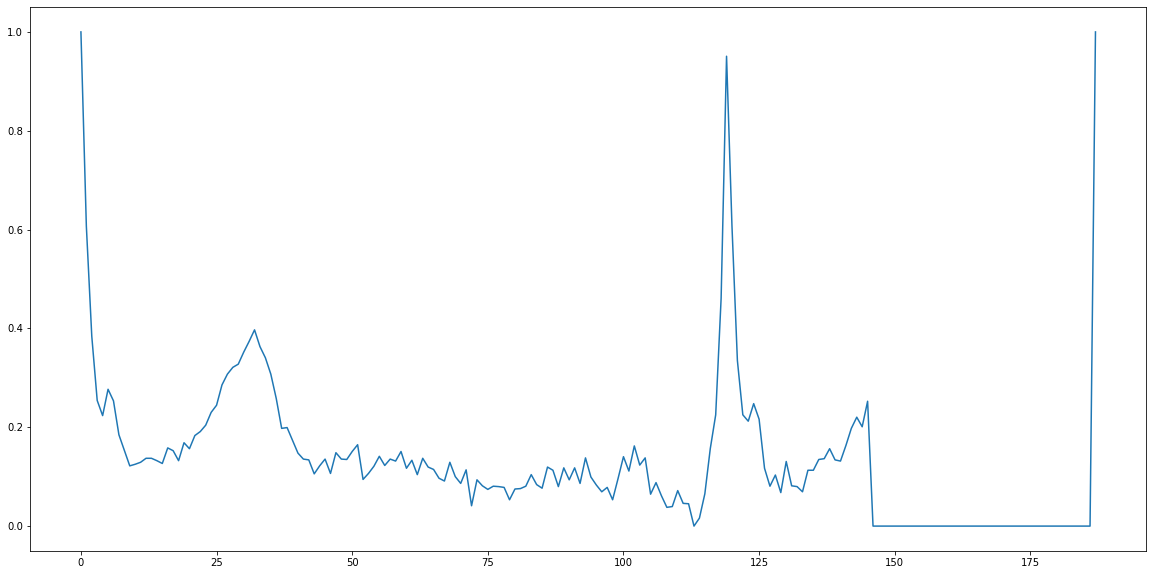

In [11]:
# 그래프를 보니 데이터가 가다가 중간에 0이 되버림
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(data_ab[0,:])

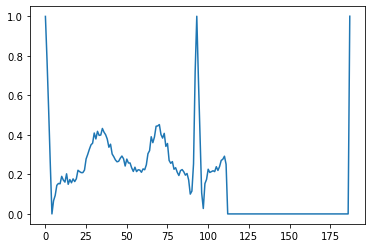

In [5]:
# 그래프를 보니 데이터가 가다가 중간에 0이 되버림
plt.plot(data_ab[5,:])

## 데이터 정제 : 1/2

In [20]:
print(data_ab.shape)
print(data_no.shape)
print(X_train_pre.shape)

(10505, 188)
(4045, 188)
(14550, 187)


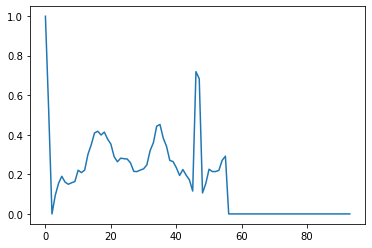

In [21]:
X_train_pre_half = X_train_pre[:, ::2]  # 
plt.plot(X_train_pre_half[5,:])

## 데이터 정제 : 1/3

In [8]:
print(data_ab.shape)
print(data_no.shape)
print(X_train_pre.shape)

(10505, 188)
(4045, 188)
(14550, 187)


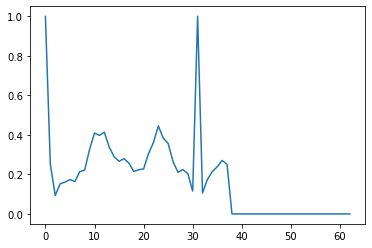

In [9]:
X_train_pre_third = X_train_pre[:, ::3]
plt.plot(X_train_pre_third[5,:])

## 데이터 정제 : 1/4

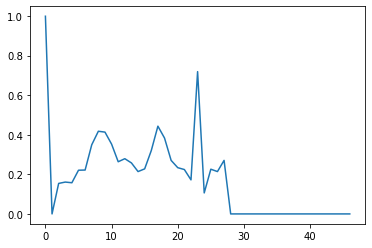

In [10]:
X_train_pre_quarter = X_train_pre[:, ::4]
plt.plot(X_train_pre_quarter[5,:])

# 학습 셋, 테스트 셋

## 데이터 전부 다 사용해서 셋 나누기

In [7]:
X_train_pre = np.concatenate((data_ab[:, :-1], data_no[:, :-1]), 0)
print('X_train_pre.shape = ', X_train_pre.shape)

y = np.concatenate((data_ab[:,-1], data_no[:,-1]), 0)
print('y = ', y.shape)

X_train_pre.shape =  (14550, 187)
y =  (14550,)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.25)

In [92]:
print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (10912, 187)
X_test.shape =  (3638, 187)
y_train.shape =  (10912,)
y_test.shape =  (3638,)


In [93]:
# train 데이터를 바로 컨벌션 레이어에 넣으면 에러남 : 뒤에 차원의 갯수가 모자라서
# 뒤쪽에 차원을 하나 추가해줘야함

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [94]:
print('X_train.shape = ', X_train.shape)
print('X_test.shape = ', X_test.shape)

X_train.shape =  (10912, 187, 1)
X_test.shape =  (3638, 187, 1)


In [95]:
y_train = to_categorical(y_train)
y_train[0]

array([0., 1.], dtype=float32)

In [96]:
y_test = to_categorical(y_test)
y_test[0]

array([1., 0.], dtype=float32)

In [97]:
print('y_train.shape = ', y_train.shape)
print('y_test.shape = ', y_test.shape)

y_train.shape =  (10912, 2)
y_test.shape =  (3638, 2)


## 1/2 데이터로 학습 셋, 테스트 셋 나누기

In [ ]:
X_train_pre = np.concatenate((data_ab[:, :-1], data_no[:, :-1]), 0)
print('X_train_pre.shape = ', X_train_pre.shape)

y = np.concatenate((data_ab[:,-1], data_no[:,-1]), 0)
print('y = ', y.shape)

In [22]:
X_train_half, X_test_half, y_train_half, y_test_half = train_test_split(X_train_pre_half, y, test_size=0.25)
print('X_train_half.shape = ', X_train_half.shape)
print('X_test_half.shape = ', X_test_half.shape)
print('y_train_half.shape = ', y_train_half.shape)
print('y_test_half.shape = ', y_test_half.shape)

X_train_half.shape =  (10912, 94)
X_test_half.shape =  (3638, 94)
y_train_half.shape =  (10912,)
y_test_half.shape =  (3638,)


In [23]:
# train 데이터를 바로 컨벌션 레이어에 넣으면 에러남 : 뒤에 차원의 갯수가 모자라서
# 뒤쪽에 차원을 하나 추가해줘야함

X_train_half = np.expand_dims(X_train_half, -1)
X_test_half = np.expand_dims(X_test_half, -1)

print('X_train_half.shape = ', X_train_half.shape)
print('X_test_half.shape = ', X_test_half.shape)

y_train_half = to_categorical(y_train_half)
print(y_train_half)

y_test_half = to_categorical(y_test_half)
print(y_test_half)

print('y_train_half.shape = ', y_train_half.shape)
print('y_test_half.shape = ', y_test_half.shape)

X_train_half.shape =  (10912, 94, 1)
X_test_half.shape =  (3638, 94, 1)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
y_train_half.shape =  (10912, 2)
y_test_half.shape =  (3638, 2)


## 1/3 데이터로 학습 셋, 테스트 셋 나누기

In [ ]:
X_train_pre = np.concatenate((data_ab[:, :-1], data_no[:, :-1]), 0)
print('X_train_pre.shape = ', X_train_pre.shape)

y = np.concatenate((data_ab[:,-1], data_no[:,-1]), 0)
print('y = ', y.shape)

In [11]:
X_train_third, X_test_third, y_train_third, y_test_third = train_test_split(X_train_pre_third, y, test_size=0.25)
print('X_train_third.shape = ', X_train_third.shape)
print('X_test_third.shape = ', X_test_third.shape)
print('y_train_third.shape = ', y_train_third.shape)
print('y_test_third.shape = ', y_test_third.shape)

X_train_third.shape =  (10912, 63)
X_test_third.shape =  (3638, 63)
y_train_third.shape =  (10912,)
y_test_third.shape =  (3638,)


In [12]:
# train 데이터를 바로 컨벌션 레이어에 넣으면 에러남 : 뒤에 차원의 갯수가 모자라서
# 뒤쪽에 차원을 하나 추가해줘야함

X_train_third = np.expand_dims(X_train_third, -1)
X_test_third = np.expand_dims(X_test_third, -1)

print('X_train_third.shape = ', X_train_third.shape)
print('X_test_third.shape = ', X_test_third.shape)

y_train_third = to_categorical(y_train_third)
print(y_train_third[0])

y_test_third = to_categorical(y_test_third)
print(y_test_third[1])

print('y_train_third.shape = ', y_train_third.shape)
print('y_test_third.shape = ', y_test_third.shape)

X_train_third.shape =  (10912, 63, 1)
X_test_third.shape =  (3638, 63, 1)
[0. 1.]
[1. 0.]
y_train_third.shape =  (10912, 2)
y_test_third.shape =  (3638, 2)


In [16]:
print(y_train_third)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


## 1/4 데이터로 학습 셋, 테스트 셋 나누기

In [ ]:
X_train_pre = np.concatenate((data_ab[:, :-1], data_no[:, :-1]), 0)
print('X_train_pre.shape = ', X_train_pre.shape)

y = np.concatenate((data_ab[:,-1], data_no[:,-1]), 0)
print('y = ', y.shape)

In [17]:
X_train_quarter, X_test_quarter, y_train_quarter, y_test_quarter = train_test_split(X_train_pre_quarter, y, test_size=0.25)
print('X_train_quarter.shape = ', X_train_quarter.shape)
print('X_test_quarter.shape = ', X_test_quarter.shape)
print('y_train_quarter.shape = ', y_train_quarter.shape)
print('y_test_quarter.shape = ', y_test_quarter.shape)

X_train_quarter.shape =  (10912, 47)
X_test_quarter.shape =  (3638, 47)
y_train_quarter.shape =  (10912,)
y_test_quarter.shape =  (3638,)


In [18]:
# train 데이터를 바로 컨벌션 레이어에 넣으면 에러남 : 뒤에 차원의 갯수가 모자라서
# 뒤쪽에 차원을 하나 추가해줘야함

X_train_quarter = np.expand_dims(X_train_quarter, -1)
X_test_quarter = np.expand_dims(X_test_quarter, -1)

print('X_train_quarter.shape = ', X_train_quarter.shape)
print('X_test_quarter.shape = ', X_test_quarter.shape)

y_train_quarter = to_categorical(y_train_quarter)
print(y_train_quarter)

y_test_quarter = to_categorical(y_test_quarter)
print(y_test_quarter)

print('y_train_quarter.shape = ', y_train_quarter.shape)
print('y_test_quarter.shape = ', y_test_quarter.shape)

X_train_quarter.shape =  (10912, 47, 1)
X_test_quarter.shape =  (3638, 47, 1)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
y_train_quarter.shape =  (10912, 2)
y_test_quarter.shape =  (3638, 2)


# CNN + LSTM 모델 생성

In [19]:
# 모델 디자인
# 시퀀셜 모델, 컨별선2개 맥스풀링 컨별선2개 맥스풀링 LSTM 완전연결층
# 학습율은 0.01인데 조절 가능함

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, stridㅠes=2))
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(LSTM(16))
model.add(Dense(units=2, activation='softmax'))

NameError: name 'X_train' is not defined

In [ ]:
# 분류하는 모델이고 원핫인코딩 되어 있기 때문에 loss는 categorical_crossentropy 사용함
# loss : 오차 함수 = 손실 함수. 오차(예측값과 실제값의 차이)를 어떤 함수로 표현할 것인가
# optimizer : loss function의 최솟값을 찾아가는 것. 최적화 ex) 경사하강법
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
with tf.device('/GPU:0'):
    model.fit(X_train_odd, y_train_odd, epochs=50, batch_size=128, validation_split=0.2)

In [ ]:
model.evaluate(X_test, y_test)

## 1/2 데이터 모델 생성

In [110]:
# 모델 디자인
# 시퀀셜 모델, 컨별선2개 맥스풀링 컨별선2개 맥스풀링 LSTM 완전연결층
# 학습율은 0.01인데 조절 가능함

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, input_shape=(X_train_half.shape[1], 1), activation='relu'))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(X_train_half.shape[1], 1), activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(LSTM(16))
model.add(Dense(units=2, activation='softmax'))

In [111]:
# 분류하는 모델이고 원핫인코딩 되어 있기 때문에 loss는 categorical_crossentropy 사용함
# loss : 오차 함수 = 손실 함수. 오차(예측값과 실제값의 차이)를 어떤 함수로 표현할 것인가
# optimizer : loss function의 최솟값을 찾아가는 것. 최적화 ex) 경사하강법
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 92, 16)            64        
                                                                 
 conv1d_33 (Conv1D)          (None, 90, 16)            784       
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 44, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_34 (Conv1D)          (None, 42, 32)            1568      
                                                                 
 conv1d_35 (Conv1D)          (None, 40, 32)            3104      
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 19, 32)           0         
 g1D)                                                 

In [ ]:
with tf.device('/GPU:0'):
    model.fit(X_train_odd, y_train_odd, epochs=50, batch_size=128, validation_split=0.2)

In [ ]:
model.evaluate(X_test_odd, y_test_odd)

## 1/3 데이터 모델 생성

In [29]:
# 모델 디자인
# 시퀀셜 모델, 컨별선2개 맥스풀링 컨별선2개 맥스풀링 LSTM 완전연결층
# 학습율은 0.01인데 조절 가능함

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, input_shape=(X_train_third.shape[1], 1), activation='relu'))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(X_train_third.shape[1], 1), activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(LSTM(16))
model.add(Dense(units=2, activation='softmax'))

In [30]:
# 분류하는 모델이고 원핫인코딩 되어 있기 때문에 loss는 categorical_crossentropy 사용함
# loss : 오차 함수 = 손실 함수. 오차(예측값과 실제값의 차이)를 어떤 함수로 표현할 것인가
# optimizer : loss function의 최솟값을 찾아가는 것. 최적화 ex) 경사하강법
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 61, 16)            64        
                                                                 
 conv1d_5 (Conv1D)           (None, 59, 16)            784       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 29, 16)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 27, 32)            1568      
                                                                 
 conv1d_7 (Conv1D)           (None, 25, 32)            3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 12, 32)           0         
 1D)                                                  

In [32]:
with tf.device('/GPU:0'):
    model.fit(X_train_third, y_train_third, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
69/69 [==============================] - 2s 12ms/step - loss: 0.5589 - accuracy: 0.7268 - val_loss: 0.4916 - val_accuracy: 0.7572
Epoch 2/100
69/69 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.7662 - val_loss: 0.5172 - val_accuracy: 0.7435
Epoch 3/100
69/69 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.8066 - val_loss: 0.3659 - val_accuracy: 0.8301
Epoch 4/100
69/69 [==============================] - 0s 5ms/step - loss: 0.3570 - accuracy: 0.8362 - val_loss: 0.3389 - val_accuracy: 0.8525
Epoch 5/100
69/69 [==============================] - 0s 5ms/step - loss: 0.3207 - accuracy: 0.8605 - val_loss: 0.3037 - val_accuracy: 0.8667
Epoch 6/100
69/69 [==============================] - 0s 5ms/step - loss: 0.2773 - accuracy: 0.8834 - val_loss: 0.2432 - val_accuracy: 0.8956
Epoch 7/100
69/69 [==============================] - 0s 5ms/step - loss: 0.2352 - accuracy: 0.9001 - val_loss: 0.2055 - val_accuracy: 0.9157
Epoch 8/100


Epoch 59/100
69/69 [==============================] - 0s 4ms/step - loss: 0.0140 - accuracy: 0.9950 - val_loss: 0.0597 - val_accuracy: 0.9821
Epoch 60/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0724 - val_accuracy: 0.9743
Epoch 61/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9922 - val_loss: 0.0763 - val_accuracy: 0.9776
Epoch 62/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0179 - accuracy: 0.9950 - val_loss: 0.0573 - val_accuracy: 0.9808
Epoch 63/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0840 - val_accuracy: 0.9776
Epoch 64/100
69/69 [==============================] - 0s 4ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0770 - val_accuracy: 0.9757
Epoch 65/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0568 - val_accuracy: 0.9835
Epoch 

In [33]:
model.evaluate(X_test_third, y_test_third)

114/114 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9802


[0.10320314764976501, 0.9802089333534241]

## 1/4 데이터 모델 생성

In [39]:
# 모델 디자인
# 시퀀셜 모델, 컨별선2개 맥스풀링 컨별선2개 맥스풀링 LSTM 완전연결층
# 학습율은 0.01인데 조절 가능함

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, input_shape=(X_train_quarter.shape[1], 1), activation='relu'))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(Conv1D(filters=32, kernel_size=3, input_shape=(X_train_quarter.shape[1], 1), activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2))
model.add(LSTM(16))
model.add(Dense(units=2, activation='softmax'))

In [40]:
# 분류하는 모델이고 원핫인코딩 되어 있기 때문에 loss는 categorical_crossentropy 사용함
# loss : 오차 함수 = 손실 함수. 오차(예측값과 실제값의 차이)를 어떤 함수로 표현할 것인가
# optimizer : loss function의 최솟값을 찾아가는 것. 최적화 ex) 경사하강법
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 45, 16)            64        
                                                                 
 conv1d_13 (Conv1D)          (None, 43, 16)            784       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 21, 16)           0         
 1D)                                                             
                                                                 
 conv1d_14 (Conv1D)          (None, 19, 32)            1568      
                                                                 
 conv1d_15 (Conv1D)          (None, 17, 32)            3104      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 8, 32)            0         
 1D)                                                  

In [42]:
with tf.device('/GPU:0'):
    model.fit(X_train_quarter, y_train_quarter, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
69/69 [==============================] - 2s 11ms/step - loss: 0.5720 - accuracy: 0.7114 - val_loss: 0.5380 - val_accuracy: 0.7270
Epoch 2/100
69/69 [==============================] - 0s 5ms/step - loss: 0.4318 - accuracy: 0.7957 - val_loss: 0.4067 - val_accuracy: 0.8053
Epoch 3/100
69/69 [==============================] - 0s 5ms/step - loss: 0.3649 - accuracy: 0.8378 - val_loss: 0.3486 - val_accuracy: 0.8415
Epoch 4/100
69/69 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.8620 - val_loss: 0.3232 - val_accuracy: 0.8493
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2954 - accuracy: 0.8767 - val_loss: 0.3040 - val_accuracy: 0.8694
Epoch 6/100
69/69 [==============================] - 0s 4ms/step - loss: 0.2743 - accuracy: 0.8796 - val_loss: 0.2999 - val_accuracy: 0.8690
Epoch 7/100
69/69 [==============================] - 0s 5ms/step - loss: 0.2541 - accuracy: 0.8917 - val_loss: 0.3230 - val_accuracy: 0.8621
Epoch 8/100


Epoch 59/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0979 - val_accuracy: 0.9725
Epoch 60/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0391 - accuracy: 0.9852 - val_loss: 0.0880 - val_accuracy: 0.9739
Epoch 61/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.1161 - val_accuracy: 0.9656
Epoch 62/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.1107 - val_accuracy: 0.9702
Epoch 63/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0399 - accuracy: 0.9860 - val_loss: 0.1777 - val_accuracy: 0.9482
Epoch 64/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.9871 - val_loss: 0.0991 - val_accuracy: 0.9707
Epoch 65/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0360 - accuracy: 0.9875 - val_loss: 0.1239 - val_accuracy: 0.9652
Epoch 

In [43]:
model.evaluate(X_test_quarter, y_test_quarter)

114/114 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9775


[0.10989618301391602, 0.9774601459503174]